# Customer Churn Prediction
This notebook builds and evaluates machine learning models to predict customer churn.  
Performed in this notebook:
- Perform **data preprocessing** (cleaning, feature selection, handling class imbalance).
- Build and evaluate models including **Logistic Regression, Decision Tree, and Random Forest**.
- Compare performance using **accuracy, precision, recall, F1-score, and AUC-ROC**.

In [47]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', 100) # To view all the columns

In [48]:
# Loading the dataset
df = pd.read_csv('Churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [49]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Understanding Features in The Dataset  
#### The description of the features in the dataset is as follows:  

- **state**: The state where the customer lives.  
- **account length**: Number of days the customer has had an account.  
- **area code**: Customer's area code.  
- **phone number**: Customer's phone number.  
- **international plan**: Yes if the customer has the international plan, No otherwise.  
- **voice mail plan**: Yes if the customer has the voice mail plan, No otherwise.  
- **number vmail messages**: Number of voicemails sent by the customer.  
- **total day minutes**: Total call duration (minutes) during the day.  
- **total day calls**: Total number of calls during the day.  
- **total day charge**: Total charges for calls made during the day.  
- **total eve minutes**: Total call duration (minutes) in the evening.  
- **total eve calls**: Total number of calls in the evening.  
- **total eve charge**: Total charges for calls made in the evening.  
- **total night minutes**: Total call duration (minutes) at night.  
- **total night calls**: Total number of calls at night.  
- **total night charge**: Total charges for calls made at night.  
- **total intl minutes**: Total call duration (minutes) for international calls.  
- **total intl calls**: Total number of international calls.  
- **total intl charge**: Total charges for international calls.  
- **customer service calls**: Number of calls made to customer service.  
- **churn** (*Target Variable*): `True` if the customer terminated their contract, `False` otherwise. 

## Data Preparation  
- Dropping unnecessary features.
- Handling missing values and categorical encoding.
- Addressing class imbalance using SMOTE.

In [50]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

##### The phone number column can be dropped since it just provides customer's contact information which is not useful in analysis.

In [51]:
# Dropping phone number feature
df.drop('phone number', axis = 1, inplace = True)

In [52]:
#Checking for duplicates
df.duplicated().sum()

0

In [53]:
#Standardize column names:
df.columns = df.columns.str.strip().str.replace(" ", "_")

## Feature Understanding.


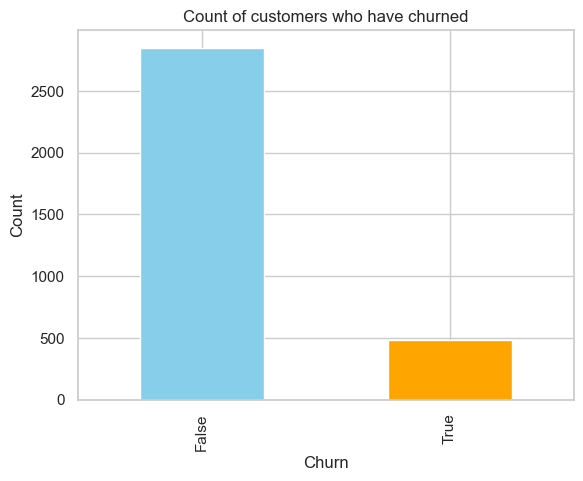

In [54]:
ax  = df['churn'].value_counts().plot(kind = 'bar', title = 'Count of customers who have churned', \
                                       color = ['Skyblue', 'Orange'])
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
plt.show()

##### Classifying Features
The features are classified into:
- **Categorical Features**: Features with distinct categories ('churn', 'international_plan',...)
- **Numerical Features**: Continous variables ('total_day_minutes', 'total_night_calls',...)

In [55]:
# Despite being a categorical variable, churn is placed in numerical columns
# to keep it from being encoded when encoding categorical variables
num_cols = ['account length', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']

cat_cols = ['state','area code','international plan','voice mail plan']

##### Churn is going to be the dependent variable in this analysis. It has been excluded from the <br> categorical columns list to keep it from being encoded in the next step and have it remain <br> as True and False rather than 1's and 0's. The results are still the same.

In [56]:
num_cols = [col.replace(" ", "_") for col in num_cols]
cat_cols = [col.replace(" ", "_") for col in cat_cols]

In [57]:
# Encoding categorical variables:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

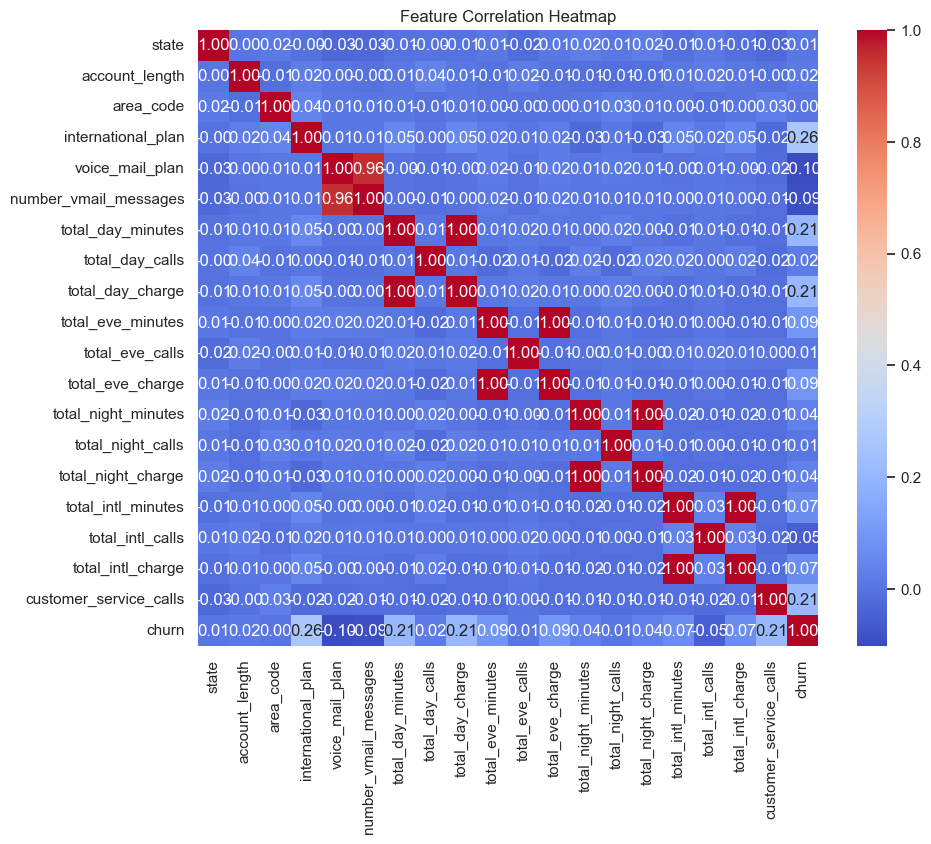

In [58]:
# Checking feature correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

##### It makes sense for the columns 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge' to be perfectly correlated with the minutes columns since they are directly proportional so they can be dropped.


In [59]:
# Dropping the columns
df.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge', 'number_vmail_messages'], axis=1, inplace=True)

In [60]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn
0,16,128,1,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,35,107,1,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,31,137,1,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,35,84,0,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,36,75,1,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,1,0,1,156.2,77,215.5,126,279.1,83,9.9,6,2,False
3329,49,68,1,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False
3330,39,28,2,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False
3331,6,184,2,1,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False


# Modeling.


## Model Performance Evaluation
The models will be compared using:
- **Accuracy:** Overall correctness.
- **Precision:** How many predicted churners actually churned.
- **Recall:** How many actual churners were correctly identified.
- **F1-score:** Balance between precision and recall.
- **AUC-ROC:** Ability to distinguish between churn and non-churn customers.

## Logistic Regression Model.

The first model is a baseline Logistic Regression Model to see how well it predicts churn

In [61]:
# Defining the target and features.
X = df.drop('churn', axis = 1)
y = df['churn']

In [62]:
#Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
# Initializaing logistic regression model
log_reg = LogisticRegression()

y_pred_cv = cross_val_predict(log_reg, X_scaled, y, cv=5)

In [64]:
print("Logistic Regression Cross-Validated Classification Report:")
print(classification_report(y, y_pred_cv))

Logistic Regression Cross-Validated Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      2850
        True       0.56      0.22      0.31       483

    accuracy                           0.86      3333
   macro avg       0.72      0.59      0.62      3333
weighted avg       0.83      0.86      0.84      3333



### Model Observations:
- The model is biased towards Non_churn (Majority class).
- The churn class has low recall which is likely due to class imbalance in the dataset.
- The model does not predict churn as much and is therefore not identifying many of the customers who actually churn.

#### Synthetic Minority Over-Sampling Technique (SMOTE) can be used to balance the imbalanced dataset.

In [65]:
# Using SMOTE to balance the dataset
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [66]:
# Predicting using cross-validation
y_pred_cv = cross_val_predict(log_reg, X_resampled, y_resampled, cv = 5)

In [67]:
print("Logistic Regression with SMOTE classification report")
print(classification_report(y_resampled, y_pred_cv))

Logistic Regression with SMOTE classification report
              precision    recall  f1-score   support

       False       0.78      0.77      0.78      2850
        True       0.78      0.79      0.78      2850

    accuracy                           0.78      5700
   macro avg       0.78      0.78      0.78      5700
weighted avg       0.78      0.78      0.78      5700



### Changes after SMOTE:
- Recall has increased to 79% from 22% meaning that the model now correctly identifies more churners.
- The accuracy has dropped from 86% to 78% but that is to be expected since the dataset has been balanced.
- The minority class had much lower performance before but now both classes perform equally.
- The model is now better at identifying both classes and is no longer biased towards non_churners.

#### The next step to optimize model performance is to fine tune the Logistic Regression model.

## Hyperparameter Tuning for Logistic Regression
The model is fine-tuned using **GridSearchCV** to find the best hyperparameters.  
Key parameters tuned:
- **Solver:** Optimization algorithm.
- **C:** Regularization strength.
- **Penalty:** Type of regularization (L1/L2).

In [68]:
param_grid = {
    'solver': ['liblinear', 'saga'],
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
}

log_reg = LogisticRegression()

# Performing Grid Search with Cross-Validation
grid_search = GridSearchCV(log_reg, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [69]:
print("The best Hyperparameters:", grid_search.best_params_)
print("The best accuracy score:", grid_search.best_score_)

The best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
The best accuracy score: 0.7826315789473685


In [70]:
# Obtain the best model
best_log_reg = grid_search.best_estimator_

# Running cross validation with the best model
y_pred_cv_tuned = cross_val_predict(best_log_reg, X_resampled, y_resampled, cv = 5)

# Saving model performance for later comparison with other models
log_reg_report = classification_report(y_resampled, y_pred_cv_tuned, output_dict = True)

In [71]:
print("Tuned Logistic Regression classification results:")
print(classification_report(y_resampled, y_pred_cv_tuned))

Tuned Logistic Regression classification results:
              precision    recall  f1-score   support

       False       0.80      0.76      0.78      2850
        True       0.77      0.80      0.79      2850

    accuracy                           0.78      5700
   macro avg       0.78      0.78      0.78      5700
weighted avg       0.78      0.78      0.78      5700



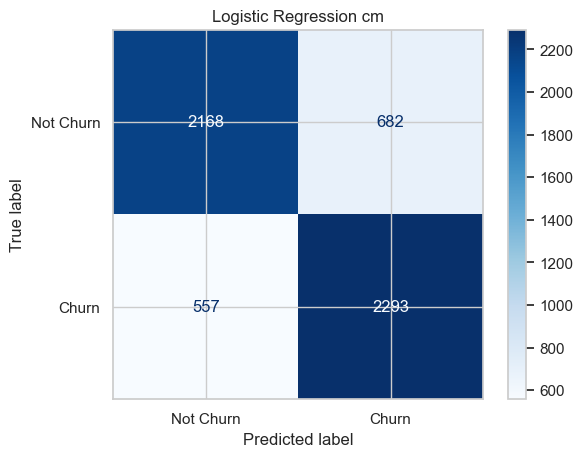

In [91]:
# Tuned logistic Regression confusion matrix
cm = confusion_matrix(y_resampled, y_pred_cv_tuned)

# Displaying the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn', 'Churn'])
disp.plot(cmap = 'Blues')
plt.title('Logistic Regression cm')
plt.show()

#### Although it's much better at catching churners, the tuned model does not have a significant change from the previous model.

### Random Forest Model.

In [73]:
# Starting with a non-tuned random forest model

# Initializing RF
rf_baseline = RandomForestClassifier(random_state = 42)

# Fitting the model
rf_baseline.fit(X_resampled, y_resampled)

#Predicting using CV
y_pred_rf_baseline = cross_val_predict(rf_baseline, X_resampled, y_resampled, cv = 5)

In [74]:
print("Baseline RF Classification Report:")
print(classification_report(y_resampled, y_pred_rf_baseline))

Baseline RF Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96      2850
        True       0.96      0.96      0.96      2850

    accuracy                           0.96      5700
   macro avg       0.96      0.96      0.96      5700
weighted avg       0.96      0.96      0.96      5700



#### 96%! is a huge improvement from the previous model which is most likely due to overfitting.
#### The model is already performing well so tuning might help reduce overfitting.
#### Using Randomized Hyperparameter Tuning since GridSearch Takes too long.

In [75]:
param_dist = {
    "n_estimators": randint(50, 150),
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5)
}

tuned_rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    tuned_rf, param_distributions = param_dist, n_iter = 20, cv = 3, scoring = "accuracy", n_jobs = -1, random_state = 42
)

# Fitting the model
random_search.fit(X_resampled, y_resampled)

best_rf = random_search.best_estimator_

y_pred_rf_tuned = cross_val_predict(best_rf, X_resampled, y_resampled, cv=3)

rf_report = classification_report(y_resampled, y_pred_rf_tuned, output_dict = True)

In [76]:
print("Tuned RF Classification Report:")
print(classification_report(y_resampled, y_pred_rf_tuned))

Tuned RF Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.96      0.95      2850
        True       0.96      0.94      0.95      2850

    accuracy                           0.95      5700
   macro avg       0.95      0.95      0.95      5700
weighted avg       0.95      0.95      0.95      5700



#### The Accuracy is still high but recall and precision are more balanced compared to the non-tuned model.

#### Next is to check cross-validation scores to evaluate model performance.
To ensure the model generalizes well:
- Cross-validation accuracy is checked.
- Test accuracy is compared with training accuracy.
- If test accuracy is much lower, then it's likely that the model is overfitting.

In [77]:
cv_scores = cross_val_score(best_rf, X, y, cv = 5, scoring='accuracy')
print("Cross-Validation Accuracy:", np.mean(cv_scores))

# To test if the model overfits by checking test set accuracy.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Applying SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

test_accuracy = best_rf.score(X_test_scaled, y_test)
print("Test accuracy:", test_accuracy)

Cross-Validation Accuracy: 0.9471930701316008
Test accuracy: 0.892


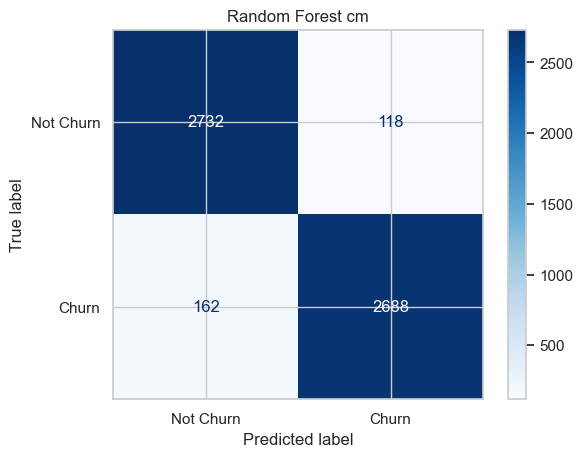

In [92]:
cm = confusion_matrix(y_resampled, y_pred_rf_tuned)

# Displaying the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn', 'Churn'])
disp.plot(cmap = 'Blues')
plt.title('Random Forest cm')
plt.show()

## Feature Importance in Random Forest 
The higher the importance score, the more influence the feature has on churn prediction.

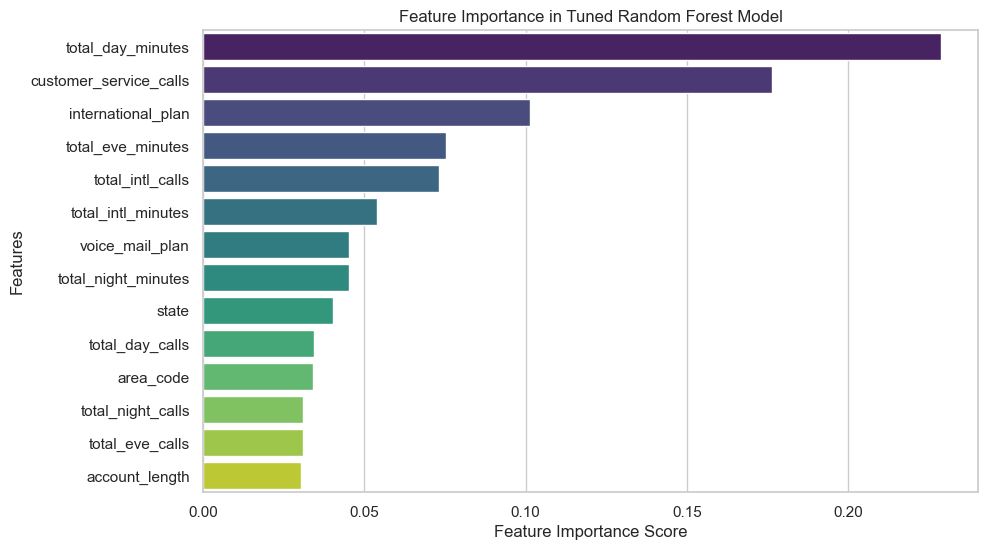

In [79]:
feature_importances = best_rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by = 'Importance', ascending = False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x = feature_importance_df['Importance'], y = feature_importance_df['Feature'], hue = feature_importance_df['Feature'], palette = "viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Tuned Random Forest Model")
plt.show()

#### Implementing Decision Tree model.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

# Initializing and training the Decision Tree model
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.93      0.94       857
        True       0.65      0.74      0.69       143

    accuracy                           0.91      1000
   macro avg       0.80      0.84      0.82      1000
weighted avg       0.91      0.91      0.91      1000



In [90]:
dt_tuned = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5, 
    random_state=42
)
dt_tuned.fit(X_scaled, y)

y_pred_dt_tuned = dt_tuned.predict(X_scaled)

#Saving the model report as for comparison with other models
dt_report = classification_report(y, y_pred_dt_tuned, output_dict = True)

print("Tuned Decision Tree Report:")
print(classification_report(y, y_pred_dt_tuned))

Tuned Decision Tree Report:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97      2850
        True       0.91      0.72      0.80       483

    accuracy                           0.95      3333
   macro avg       0.93      0.85      0.89      3333
weighted avg       0.95      0.95      0.95      3333



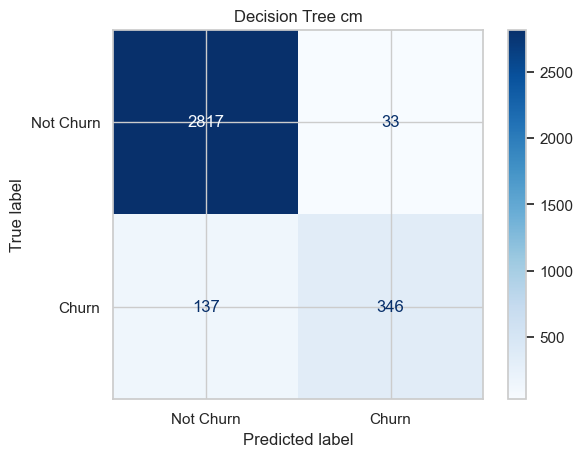

In [93]:
# Decision Tree confusion matrix
cm = confusion_matrix(y, y_pred_dt_tuned)

# Displaying the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn', 'Churn'])
disp.plot(cmap = 'Blues')
plt.title('Decision Tree cm')
plt.show()

In [83]:
# Saving each model's performance in a dictionary
model_performance = {
    "Logistic Regression": log_reg_report,
    "Decision Tree": dt_report,
    "Random Forest": rf_report
}

In [84]:
# Checking how the keys are stored 
print(model_performance["Logistic Regression"].keys())

dict_keys(['False', 'True', 'accuracy', 'macro avg', 'weighted avg'])


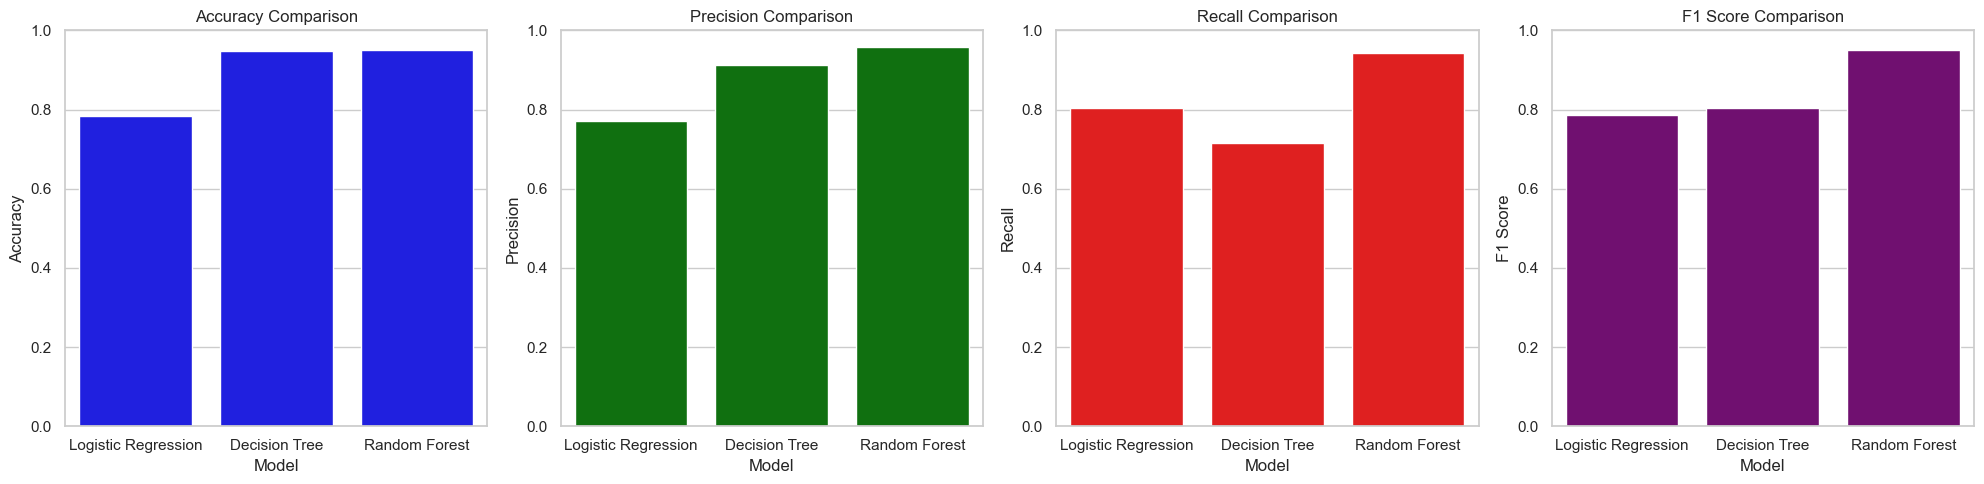

In [85]:
colors = ["blue", "green", "red", "purple"]

models = ["Logistic Regression", "Decision Tree", "Random Forest"]
accuracy = [model_performance[m]["accuracy"] for m in models]
precision = [model_performance[m]["True"]["precision"] for m in models]
recall = [model_performance[m]["True"]["recall"] for m in models]
f1_score = [model_performance[m]["True"]["f1-score"] for m in models]

# Create a DataFrame for easier plotting
performance_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1_score
})

sns.set_theme(style="whitegrid")

# Plot comparison of metrics
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

for i, metric in enumerate(metrics):
    sns.barplot(ax=axes[i], x = "Model", y = metric, data = performance_df, color = colors[i])
    axes[i].set_title(f"{metric} Comparison")
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

## ROC Curve Analysis
The ROC Curve shows how well the model distinguishes between churners and non-churners.
- A higher AUC (Area Under the Curve) means a better model.
- If AUC = 1, then the model is overfitting.

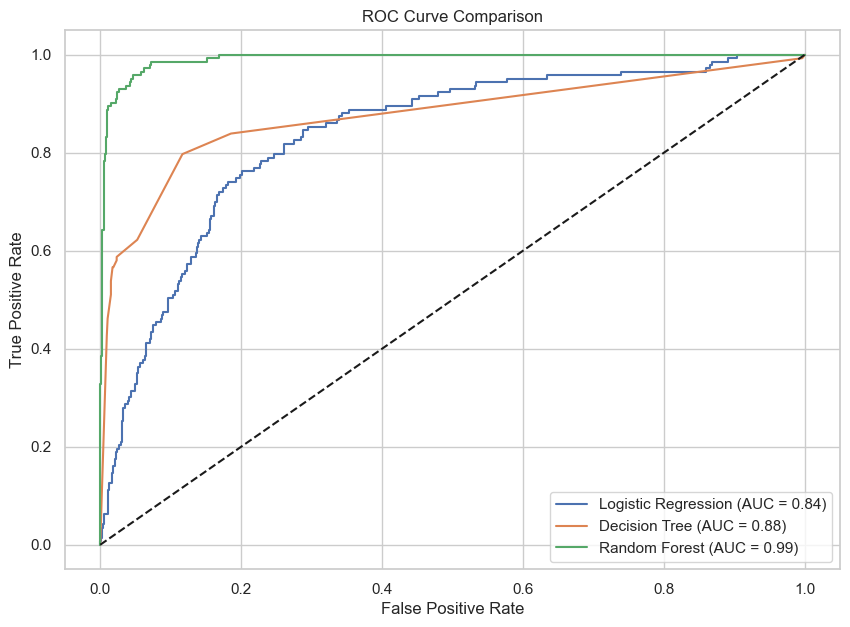

In [86]:
def plot_roc_curves(models, X, y):
    plt.figure(figsize=(10, 7))
    for name, model in models.items():
        y_proba = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_proba)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--')  # Random chance line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison")
    plt.legend()
    plt.show()

# Plot ROC Curves for the models
models = {
    "Logistic Regression": best_log_reg,
    "Decision Tree": dt_tuned,
    "Random Forest": best_rf
}
plot_roc_curves(models, X_test_scaled, y_test)

# Conclusion
After comparing models:
- Random Forest performs the best with high AUC and accuracy.
- Next steps could include:
  - Further hyperparameter tuning to reduce overfitting.
  - Testing additional algorithms.
  - Deploying the model in a production environment.